# SI618 Homework 2

## Uniqname: rugexu

In [1]:
import pandas as pd
import numpy as np

## Q1 Describe the dataset.

### 1. Load the data.

In [2]:
invoices = pd.read_json('invoices.json')
invoices.head()

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


In [3]:
items = pd.read_json('items.json')
items.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [4]:
purchases = pd.read_json('purchases.json')
purchases.head()

,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6
2,536365,SC84406B,8
3,536365,SC84029G,6
4,536365,SC84029E,6


### 2. What fraction of invoices were shipped?

In [5]:
total_num = invoices.shape[0]
total_num

25943

In [6]:
cancel_num = invoices['InvoiceNo'].str.contains('C').sum()
cancel_num

3837

In [7]:
shipped_num = total_num - cancel_num
shipped_num

22106

In [8]:
shipped_num / total_num

0.8520988320548896

### 3. How many unique customers are there (regardless of shipped or not)?

In [9]:
invoices['CustomerID'].nunique()

4372

### 4. What the total number of unique items with a unit price greater than 2?

In [10]:
items[items['UnitPrice'] > 2]['StockCode'].nunique()

2262

### 5. Are there any columns with null values?

In [11]:
invoices.isnull().sum()

InvoiceNo         0
InvoiceDate       0
CustomerID     3722
Country           0
dtype: int64

In [12]:
items.isnull().sum()

StockCode        0
Description    176
UnitPrice        0
dtype: int64

In [13]:
purchases.isnull().sum()

InvoiceNo      0
StockCodeSC    0
Quantity       0
dtype: int64

The invoices and the items dataframes have null values while the purchases dataframe doesn't.

### 6. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

I think that the merge function is a good choice when there exist common columns. I will first merge invoices and purchases on 'InvoiceNo', and then merge the result dataframe with items on 'StockCode'.

## Q2. Invoice Analysis

### 1. For each customer calculate how many shipped invoices they have placed. List the top 10 customers who have placed an invoice in descending order.

In [14]:
shipped_invoices = invoices[~invoices['InvoiceNo'].str.contains('C')]
invoices_count = shipped_invoices.groupby('CustomerID')['InvoiceNo'].nunique()
sorted_invoices_count = invoices_count.sort_values(ascending=False)
sorted_invoices_count.head(10)

CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

### 2. Perform a similar calculation but instead of the number of invoices, calculate the average quantity of items per invoice for each customer. List the top 10 customers in descending order.

In [15]:
shipped_purchases = purchases[~purchases['InvoiceNo'].str.contains('C')]
shipped_purchases_quantity = shipped_purchases.groupby('InvoiceNo').sum()
shipped_invoices_purchases = shipped_invoices.merge(shipped_purchases_quantity, on='InvoiceNo')
shipped_invoices_purchases = shipped_invoices_purchases[~shipped_invoices_purchases.InvoiceNo.duplicated()]
avg_quantity_items = shipped_invoices_purchases.groupby('CustomerID')['Quantity'].mean()
sorted_avg_quantity_items = avg_quantity_items.sort_values(ascending=False)
sorted_avg_quantity_items.head(10)

CustomerID
12346.0    74215.000000
16446.0    40498.500000
13256.0    12540.000000
18251.0     7824.000000
15749.0     6009.333333
13135.0     4300.000000
16754.0     4280.000000
12415.0     3698.571429
12688.0     3028.000000
15372.0     2924.000000
Name: Quantity, dtype: float64

### 3. Based on 1 and 2, does it appear that the more invoices a customer have, the smaller the average size of an invoice? Explain your reasoning.

I think it's possibly true because the customers who have the most invoices do not appear in the top 10 who bought the largest average quantity of items per invoice. But I'm not so sure if this trend is entirely correct, as only the top 10 are listed here.

## Q3. Item Analysis

### 1. What is the median item-unit price?

In [16]:
items = items[~items.StockCode.duplicated()]
items.UnitPrice.median()

2.51

### 2. What % of items are over $10?

In [17]:
over10_items_num = (items['UnitPrice'] > 10).sum()
over10_items_num

259

In [18]:
total_items_num = items.shape[0]
total_items_num

4070

In [19]:
over10_items_num / total_items_num

0.06363636363636363

6.36% of items are over $10.

### 3. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis

In [20]:
import matplotlib.pyplot as pl

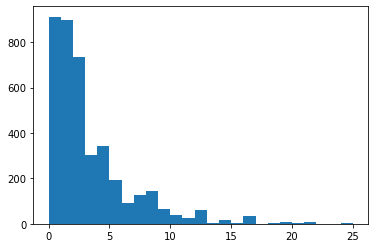

In [21]:
pl.hist(items['UnitPrice'],bins=25,range=[0, 25])
pl.show()

## Q4. Order Trends

### 1. What are the top 10 most ordered items (Quantity) in descending order?

In [22]:
purchases['StockCode'] = purchases['StockCodeSC'].str.replace("SC","")
purchases.dropna(subset=['StockCode'])
purchases.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False).head(10)

StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
21212     36039
23084     30646
22492     26437
22616     26315
21977     24753
Name: Quantity, dtype: int64

### 2. What are the top 10 most frequently ordered by customers in descending order?

In [23]:
purchases.groupby('StockCode')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)

StockCode
85123A    2246
22423     2172
85099B    2135
47566     1706
20725     1608
84879     1468
22720     1462
22197     1442
21212     1334
22383     1306
Name: InvoiceNo, dtype: int64

### 3. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by marking up the unit price by 25%.)

In [24]:
items_purchases = items.merge(purchases, on='StockCode')
items_purchases['Revenue'] = items_purchases['UnitPrice'] * 1.25 * items_purchases['Quantity']
items_purchases.groupby('InvoiceNo').sum()['Revenue'].sort_values(ascending=False).head(5)

InvoiceNo
547966    712212.5000
581483    210587.0000
541431     96479.5000
556255     37305.0000
556917     34545.9125
Name: Revenue, dtype: float64

## Q5. Customer Analysis

### 1. Discretize customers into quartiles (Q1, Q2, Q3, Q4) using dummy variables based on the total revenue they have generated for the company.

In [25]:
shipped_items_purchases = items_purchases[~items_purchases['InvoiceNo'].str.contains('C')]
invoices_items_purchases = invoices.merge(shipped_items_purchases, on='InvoiceNo')
customers = invoices_items_purchases.groupby('CustomerID').sum()
customers = customers.drop(['UnitPrice', 'Quantity'], axis=1)   
customers

,Revenue
CustomerID,
12346.0,96479.5000
12347.0,6798.0500
12348.0,2237.7000
12349.0,2408.7000
12350.0,510.0500
...,...
18280.0,317.0750
18281.0,84.3500
18282.0,290.4625


In [26]:
bins = customers['Revenue'].quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='linear')
customers['Segment'] = pd.cut(customers['Revenue'],bins,labels=['Q1','Q2','Q3','Q4'])
customers

,Revenue,Segment
CustomerID,,
12346.0,96479.5000,Q4
12347.0,6798.0500,Q4
12348.0,2237.7000,Q3
12349.0,2408.7000,Q3
12350.0,510.0500,Q2
...,...,...
18280.0,317.0750,Q1
18281.0,84.3500,Q1
18282.0,290.4625,Q1


### 2. How much revenue is generated in total by each segment?

In [27]:
customers.groupby('Segment').sum()

,Revenue
Segment,
Q1,2.889927e+05
Q2,7.612348e+05
Q3,1.760744e+06
Q4,1.069523e+07


###  3. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.

In [28]:
df = customers.merge(invoices, on='CustomerID')
df = df.merge(purchases, on='InvoiceNo')
pd.pivot_table(df, values=['Quantity'], index=['StockCode'], columns=['Segment'], aggfunc=np.mean).head(10)

Quantity                                 
Segment           Q1         Q2         Q3         Q4
StockCode                                            
10002       1.000000   7.000000   8.166667  18.825000
10080            NaN  24.000000   7.750000  14.750000
10120       3.000000   4.142857   5.400000   8.187500
10123C      1.000000   3.000000   1.000000        NaN
10124A      3.500000        NaN   1.000000   4.000000
10124G      4.000000   5.000000        NaN   4.000000
10125       2.000000   9.857143  10.882353  25.473684
10133      12.000000  21.416667  25.136364  17.686747
10135       6.888889  19.166667   8.240000  18.914286
11001       4.400000  11.000000  12.666667  18.650000